### **Project Summary:**

Telco is concerned about its significant customer attrition rate and has asked Codeup's Data Science team to identify drivers of churn. To do this, we created a machine learning model which predicts future customer churn as accurately as possible. 

**Project Goals:**
- Find drivers for customer churn at Telco
- Construct a ML classification model that accurately predicts customer churn. 

**Using a Random Forest Model, we identified the following predictors of churn:**
- lack of tech support
- month-to-month contract
- non-enrollment in auto-pay
- fiber optic internet 
- not subscribing to streaming movies and/or tv

We have created a csv file, ```churn_probability.csv``` which details the prediction and probability of churn for each Telco customer in our test data. We have also developed several recommendations to reduce future customer churn. 

All files referenced in this presentation are available in the github repository for this project:   https://github.com/barbmarques/classification-project-telco.








____________________________________________________________________________________________________

### ```Planning```

**Database Features**
- We began with a dataset containing 24 attributes of 7,043 customers
- A data dictionary is included in the README.md file on the github repository at: https://github.com/barbmarques/classification-project-telco/blob/main/README.md



**Initial Questions:**
- Does the type of internet service (DSL/fiber optic) have an effect customer churn?
- What services (streaming/support) might increase customer retention?


**The Pipeline:**  ```Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver ```
- Each step in the our process is recorded and staged on a Trello board at:  https://trello.com/b/vOXbVcbl

____________________________________________________________________________________________________

### ```Acquiring the Data Set```

The data was acquired by running the ```get_telco_data()```, a function included in the ```acquire.py``` file found in our github repository. Step-by-step instructions for reproducting our findings are included in the README.md file.

In [10]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prepare import train_validate_test_split

#remove warning boxes
import warnings 
warnings.filterwarnings("ignore")

#imports for acquire/prepare/explore
import acquire
import env
import prepare
import explore
from scipy import stats
import graphviz
from graphviz import Graph
from acquire import get_telco_data

# imports for modeling/evaluating
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import logistic_regression_util
from prepare import train_validate_test_split

In [11]:
# Acquire the data from the telco_churn database on the Codeup data science database server. 
df = get_telco_data()

In [12]:
# Getting to know the data
df.customer_id.nunique()

7043

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

#### Visualizing Individual Columns

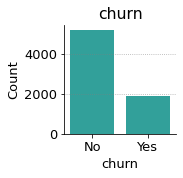

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


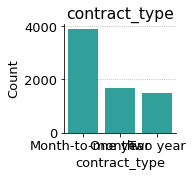

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


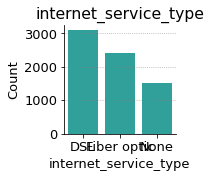

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


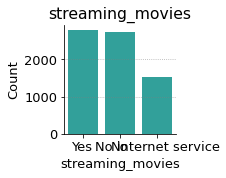

                        streaming_movies  Count  Percent
No                                   Yes   2785    39.54
Yes                                   No   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


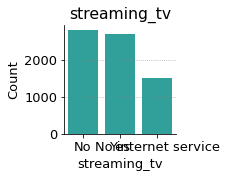

                            streaming_tv  Count  Percent
No                                    No   2810    39.90
Yes                                  Yes   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


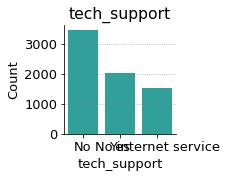

                            tech_support  Count  Percent
No                                    No   3473    49.31
Yes                                  Yes   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


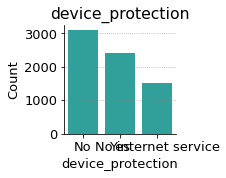

                       device_protection  Count  Percent
No                                    No   3095    43.94
Yes                                  Yes   2422    34.39
No internet service  No internet service   1526    21.67
_________________________________________________________________


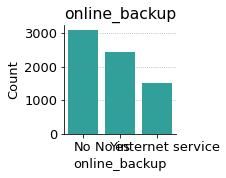

                           online_backup  Count  Percent
No                                    No   3088    43.84
Yes                                  Yes   2429    34.49
No internet service  No internet service   1526    21.67
_________________________________________________________________


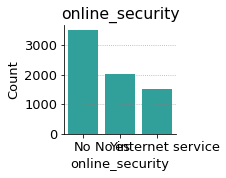

                         online_security  Count  Percent
No                                    No   3498    49.67
Yes                                  Yes   2019    28.67
No internet service  No internet service   1526    21.67
_________________________________________________________________


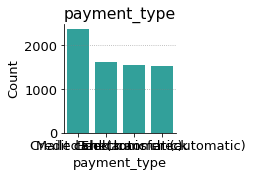

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                 Credit card (automatic)   1612    22.89
Bank transfer (automatic)           Electronic check   1544    21.92
Credit card (automatic)    Bank transfer (automatic)   1522    21.61
_________________________________________________________________


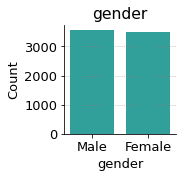

        gender  Count  Percent
Male      Male   3555    50.48
Female  Female   3488    49.52
_________________________________________________________________


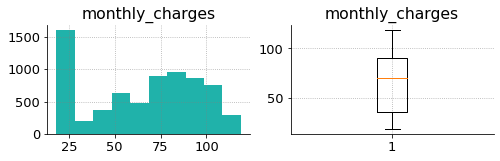

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


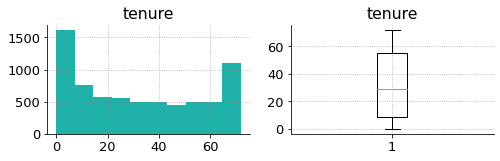

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


In [14]:
cat_vars = ['churn','contract_type','internet_service_type',
            'streaming_movies','streaming_tv','tech_support','device_protection','online_backup',
            'online_security', 'payment_type', 'gender']
quant_vars = ['monthly_charges','tenure']
explore.explore_univariate(df, cat_vars, quant_vars)

In [15]:
# cat_vars = ['churn', 'paperless_billing','contract_type','internet_service_type','multiple_lines',
#             'streaming_movies','streaming_tv','tech_support','device_protection','online_backup',
#             'online_security','phone_service', 'payment_type', 'gender','senior_citizen','partner',
#             'dependents', ]
# quant_vars = ['monthly_charges','tenure']
# explore.explore_univariate(df, cat_vars, quant_vars)

____________________________________________________________________________________________________

###  Acquire Takeaways - Customer Characteristics:
- 27% of all customers have churned
- Gender is split 50/50, so it is not likely a driver of churn
- 45% of all customers use some sort of automatic payments
- 55% of all customers are on MTM contracts
- 44% of all customers have dsl internet
- 19% of all customers are senior citizens



____________________________________________________________________________________________________

### ```Preparing the Data Set```

The function clean_telco(df):

**Handled missing values:**
- total_charges has 11 missing values
- these missing values are customers with zero tenure, so it was reasonable to replace NaNs with zero

**Changed data types:**
- data types of all categorical variables were encoded or converted to bools and then to ints/floats for compatibility with modeling algorithms (except customer_id which is alpha-numeric)
- total_charges, a continuous variable, was converted to a float64

**Deleted gender column**
- since visualizations shows gender is as an even split, neither can be identified as a driver of churn.

**Deleted duplicate columns:** 
- payment_type, contract_type, internet_service_type 

**Renamed columns**
- renamed several columns to clarify the boolean value

**Engineered features:** 
- streamer: combines steaming content: streaming_tv and/or streaming_movies 
- auto-pay: combines both forms of automatic payment: auto bank draft & automatic credit card charge
- single-line, multi-line and no_phone_service were combined into phone__service 
- tenure years: represent tenure months in years (tenure/12)
- four distinct features to reflect partner/dependent relationships


The data was cleaned by running the ```clean_telco()``` function which is found in ```prepare.py``` file found in our github repository. Step-by-step instructions for this process are included in the README.md file.

In [16]:
telco_churn = prepare.clean_telco(df)
telco_churn.head()


,customer_id,senior_citizen,tenure_months,paperless_billing,monthly_charges,total_charges,tenure_years,phone_services,not_streamer,has_churned,...,e_Check,sends_check,has_auto_pay,dsl,fiber,no_internet,no_tech_support,no_online_security,no_online_backup,no_device_protection
0,0003-MKNFE,0,9,0,59.9,542.40,0.75,2,1,0,...,0,1,0,1,0,0,1,1,1,1
1,0013-MHZWF,0,9,1,69.4,571.45,0.75,1,1,0,...,0,0,1,1,0,0,0,1,1,1
2,0015-UOCOJ,1,7,1,48.2,340.35,0.58,1,0,0,...,1,0,0,1,0,0,1,0,1,1
3,0023-HGHWL,1,1,1,25.1,25.10,0.08,0,0,1,...,1,0,0,1,0,0,1,1,1,1
4,0032-PGELS,0,1,0,30.5,30.50,0.08,0,0,1,...,0,0,1,1,0,0,1,0,1,1


In [17]:
telco_churn.shape

(7043, 27)

In [18]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           7043 non-null   object 
 1   senior_citizen        7043 non-null   int64  
 2   tenure_months         7043 non-null   int64  
 3   paperless_billing     7043 non-null   int64  
 4   monthly_charges       7043 non-null   float64
 5   total_charges         7032 non-null   float64
 6   tenure_years          7043 non-null   float64
 7   phone_services        7043 non-null   int64  
 8   not_streamer          7043 non-null   int64  
 9   has_churned           7043 non-null   int64  
 10  is_single_no_dep      7043 non-null   int64  
 11  has_partner_no_dep    7043 non-null   int64  
 12  is_single_with_dep    7043 non-null   int64  
 13  family                7043 non-null   int64  
 14  month_to_month        7043 non-null   int64  
 15  one_year             

In [19]:
 train, validate, test = train_validate_test_split(telco_churn)

____________________________________________________________________________________________________

### ```Exploring the Data Set```

In [20]:
# # Visualizations of individual columns of TRAIN data
# cat_vars = ['auto_pay', 'e_Check', 'sends_check','month_to_month', 'one_year', 'two_year','dsl','fiber','no_internet','churn',
#             'paperless_billing','streamer','no_tech_support', 'no_device_protection','no_online_backup','no_online_security',
#             'phone_services', 'senior_citizen','is_single_no_dep','has_partner_no_dep','is_single_with_dep', 'family']
# quant_vars = ['monthly_charges','tenure_months','tenure_years']
# explore.explore_univariate(train, cat_vars, quant_vars)

In [21]:
# cat_vars = ['has_auto_pay', 'e_Check', 'sends_check','month_to_month', 'one_year', 'two_year','dsl','fiber','no_internet',
#             'paperless_billing','streamer','no_tech_support', 'no_device_protection','no_online_backup','no_online_security',
#             'phone_services','senior_citizen','is_single_no_dep','has_partner_no_dep','is_single_with_dep', 'family']
# quant_vars = ['monthly_charges','tenure_months','tenure_years']

# explore.explore_bivariate(train, 'has_churned', cat_vars, quant_vars)

has_auto_pay 
_____________________

         chi2       p-value  degrees of freedom
0  151.977733  6.407558e-35                   1

observed:
 has_churned      0     1   All
has_auto_pay                  
0             1473   763  2236
1             1424   283  1707
All           2897  1046  3943

expected:
              0           1
0  1642.833376  593.166624
1  1254.166624  452.833376


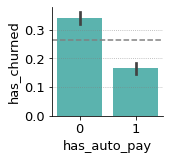


_____________________

fiber 
_____________________

         chi2       p-value  degrees of freedom
0  362.467375  8.171942e-81                   1

observed:
 has_churned     0     1   All
fiber                        
0            1879   321  2200
1            1018   725  1743
All          2897  1046  3943

expected:
              0           1
0  1616.383464  583.616536
1  1280.616536  462.383464


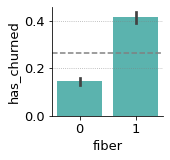


_____________________

no_tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  467.879124  9.274470e-104                   1

observed:
 has_churned         0     1   All
no_tech_support                  
0                1758   226  1984
1                1139   820  1959
All              2897  1046  3943

expected:
              0           1
0  1457.683997  526.316003
1  1439.316003  519.683997


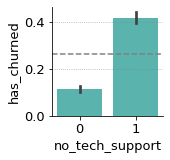


_____________________

not_streamer 
_____________________

        chi2       p-value  degrees of freedom
0  26.148645  3.161189e-07                   1

observed:
 has_churned      0     1   All
not_streamer                  
0             1532   456  1988
1             1365   590  1955
All           2897  1046  3943

expected:
              0           1
0  1460.622876  527.377124
1  1436.377124  518.622876


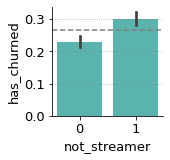


_____________________

monthly_charges 
____________________



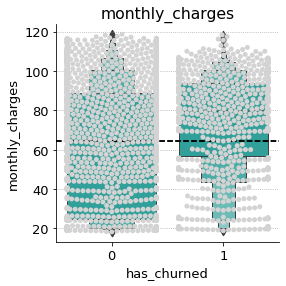

              count       mean        std    min      25%    50%      75%  \
has_churned                                                                 
0            2897.0  61.176976  31.293724  18.25  25.0500  64.35  88.9500   
1            1046.0  74.376052  24.624883  18.85  56.8125  79.50  94.0375   

                max  
has_churned          
0            118.65  
1            118.35   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1149040.0, pvalue=4.103131725466243e-31)

____________________

tenure_months 
____________________



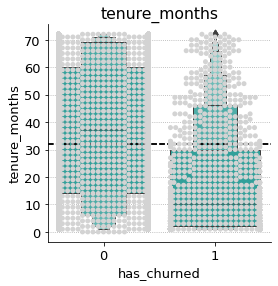

              count       mean        std  min   25%   50%   75%   max
has_churned                                                           
0            2897.0  37.021056  24.067195  0.0  14.0  37.0  60.0  72.0
1            1046.0  18.228489  19.391963  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2215778.5, pvalue=2.6225178502743525e-109)

____________________

tenure_years 
____________________



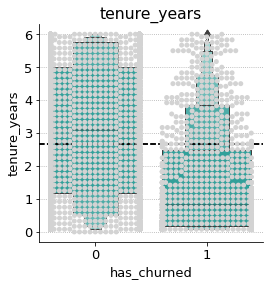

              count      mean       std   min   25%   50%  75%  max
has_churned                                                        
0            2897.0  3.085022  2.005771  0.00  1.17  3.08  5.0  6.0
1            1046.0  1.518432  1.616508  0.08  0.17  0.83  2.5  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2215778.5, pvalue=2.6225178502743525e-109)

____________________



In [23]:
cat_vars = ['has_auto_pay', 'fiber', 'no_tech_support','not_streamer']
quant_vars = ['monthly_charges','tenure_months','tenure_years']

explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

## Takeaways for Explore Visualizations:
- Customers not on some type of auto pay churn more
- Customers on fiber churn more
- Customers without streaming services churn more
- Customers without tech support churn more

_______________________________________________________________________________________________________________________

## Hypothesis Testing: 
    
**1. Does whether a customer has tech support affect whether they will churn?**

H*o*: There is no relationship between churn and tech support.   -- REJECT

H*a*: There is a dependent relationship between tech support and churn.  


#### Chi-Square Test
- checking for relationship between two categorical variables. 

In [24]:
#crosstab for tech support and churn
observed = pd.crosstab(telco_churn['has_churned'],telco_churn['no_tech_support'])
observed

no_tech_support,0,1
has_churned,,
0,3147,2027
1,423,1446


In [25]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 6.35740755126359e-176

chi2 = 799.6724332372228

Since p < .05, we reject the null hypothesis.


_______________________________________________________________________________________________________________________

## Hypothesis Test #2

**Does having access to streaming content affect whether customers will churn?**
 
H*o*: There is no relationship between streaming content and churn. -- REJECT

H*a*: There is a dependent relationship between streaming content and churn.

#### Chi-Square Test
- checking for relationship between two categorical variables. 

In [28]:
#crosstab for auto_pay and churn
observed_2 = pd.crosstab(telco_churn['has_churned'],telco_churn['not_streamer'])
observed_2

not_streamer,0,1
has_churned,,
0,2736,2438
1,808,1061


In [29]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_2)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 1.0541667201283859e-12

chi2 = 50.740591762430526

Since p < .05, we reject the null hypothesis.


_______________________________________________________________________________________________________________________

## Hypothesis Test #3

**Does having auto pay affect whether customers will churn?**

H*o*: There is no relationship between auto-pay and rate of churn. 

H*a*: They are dependent.

#### Chi-Square Test
- checking for relationship between two categorical variables. 


In [30]:
#crosstab for auto_pay and churn
observed_3 = pd.crosstab(telco_churn['has_churned'],telco_churn['has_auto_pay'])
observed_3

has_auto_pay,0,1
has_churned,,
0,2598,2576
1,1379,490


In [31]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_3)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 3.0278725722860343e-69

chi2 = 309.3485572016954

Since p < .05, we reject the null hypothesis.


_______________________________________________________________________________________________________________________

### ```Modeling & Evaluating```

### Splitting Data for Modeling

In [32]:
# Splitting out target variable from X_train

features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
target = ['has_churned']

# dropped 'has_churned' because it is target variable
# dropped 'customer_id' because it is alpha-numeric
X_train = train.drop(columns = ['has_churned', 'total_charges', 'customer_id'],axis=1)
X_validate = validate.drop(columns = ['has_churned', 'total_charges', 'customer_id'],axis=1)
X_test = test.drop(columns = ['has_churned'],axis=1)

# Establishing target as y_train -- 1 column only (our target variable)
y_train = train.has_churned
y_validate = validate.has_churned
y_test = test.has_churned

_______________________________________________________________________________________________________________________

### Establishing a Baseline Accuracy

In [33]:
y_train.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

In [34]:
baseline = pd.DataFrame(y_train)
baseline['baseline'] = 0

# baseline.columns = ['actual','baseline']
# baseline.head()

In [35]:
# cross tab of our baseline versus actual
# pd.crosstab(baseline['baseline'], baseline['actual'])

In [36]:
# let's calculate the accuracy
# positive will be not churned
# (TP + TN) / (TP + TN + FP + FN)

#predicting not churned and the customer has not churned
TP = 2897

#predicting not churned and the customer has churned
FP = 1046

#predicting the customer has churned and they have churned
TN = 0

#predicting the customer has churned and they have not churned
FN = 0


base_acc = (TP + TN) / (TP + TN + FP + FN)

print("The baseline accuracy is",round(base_acc * 100, 2),"percent.")

The baseline accuracy is 73.47 percent.


_______________________________________________________________________________________________________________________

## Logistic Regression Models

#### LR Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Logistic Regression classifier on training set: 77%
- Baseline = 73%




In [39]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the target and features we're using
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']
target = ['has_churned']

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(base_acc, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.77


In [40]:
# make prediction
y_pred = logit.predict(X_train[features])

In [41]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2897
           1       0.58      0.50      0.54      1046

    accuracy                           0.77      3943
   macro avg       0.71      0.69      0.70      3943
weighted avg       0.76      0.77      0.77      3943



#### Model 2

- features = ['no_tech_support', 'has_auto_pay','month_to_month','fiber']
- target = ['has_churned']
- Accuracy of Logistic Regression classifier on training set: 78%
- Baseline = 73%




In [42]:
# Create the logistic regression
logit2 = LogisticRegression(random_state=123)

# specify the target and features we're using
features2 = ['no_tech_support', 'has_auto_pay','month_to_month','fiber']
target = ['has_churned']

# Fit a model using only these specified features
logit2.fit(X_train[features2], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred2 = logit2.predict(X_train[features2])

print("Baseline is", round(base_acc, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train[features2], y_train)))


Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.78


In [43]:
# create predictions
y_pred2 = logit2.predict(X_train[features2])

In [44]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2897
           1       0.61      0.43      0.50      1046

    accuracy                           0.78      3943
   macro avg       0.71      0.67      0.68      3943
weighted avg       0.76      0.78      0.76      3943



_______________________________________________________________________________________________________________________

## Decision Tree

#### DT Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']
- target = ['has_churned']
- Accuracy of Decision Tree classifier on training set: 77%
- Baseline = 73%



In [46]:
# Generate a blank, decision tree model
clf1 = DecisionTreeClassifier(max_depth=3)

#Specify the features
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

# Train(fit) the model
dt1 = clf1.fit(X_train[features], y_train)
dt1

DecisionTreeClassifier(max_depth=3)

In [47]:
# Visualize the model so it can explain itself!
dot_data = export_graphviz(clf1, feature_names= features, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)

'churn_decision_tree.pdf'

In [48]:
y_pred3 = clf1.predict(X_train[features])
y_pred3_proba = clf1.predict_proba(X_train[features])

#evaluate metrics
print('Accuracy of model with all features:', clf1.score(X_train[features], y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

Accuracy of model with all features: 0.7740299264519401

The confusion matrix:
 [[2522  375]
 [ 519  527]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2897
           1       0.58      0.50      0.54      1046

    accuracy                           0.77      3943
   macro avg       0.71      0.69      0.70      3943
weighted avg       0.76      0.77      0.77      3943



In [49]:
# Model score on accuracy:
accuracy = clf1.score(X_train[features],y_train)
accuracy

0.7740299264519401

_______________________________________________________________________________________________________________________

## K-Nearest Neighbor

#### KNN Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']
- target = ['has_churned']
- Accuracy of KNN on training set: 74% 
- Baseline = 73%



In [50]:
#making the model
knn = KNeighborsClassifier()

In [51]:
#Specify the features
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

#train/fit the model

knn_fit = knn.fit(X_train[features], y_train)

In [52]:
# evaluating the model
y_pred = knn.predict(X_train[features])

In [53]:
# check model accuracy
accuracy = knn.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.759


In [54]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2897
           1       0.58      0.34      0.43      1046

    accuracy                           0.76      3943
   macro avg       0.68      0.63      0.64      3943
weighted avg       0.74      0.76      0.74      3943



_______________________________________________________________________________________________________________________

#### KNN Model 2
- k = 20
- features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']
- target = ['has_churned']
- Accuracy of KNN on training set: 74% 
- Baseline = 73%



In [55]:
#making the model
k = 20
knn_20 = KNeighborsClassifier(n_neighbors=k)


In [56]:
#Specify the features
features20 = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

#train/fit the model

knn_20_fit = knn_20.fit(X_train[features20], y_train)

In [57]:
# evaluating the model
y_pred_20 = knn_20_fit.predict(X_train[features20])

In [58]:
# check model accuracy
accuracy_20 = knn_20_fit.score(X_train[features20], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.759


In [59]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2897
           1       0.58      0.34      0.43      1046

    accuracy                           0.76      3943
   macro avg       0.68      0.63      0.64      3943
weighted avg       0.74      0.76      0.74      3943



_______________________________________________________________________________________________________________________

### Random Forest Model:

### RF Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Random Forest Classifier on training set: 78%
- Baseline = 73%




In [60]:
# Features to be used in the model
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [61]:
# Fit the model 
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [62]:
# Feature Importance
print(rf.feature_importances_)

# Make Predictions
y_pred = rf.predict(X_train[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_train[features])

[0.24035193 0.05178433 0.47898289 0.01450963 0.21437122]


In [63]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2897
           1       0.61      0.43      0.50      1046

    accuracy                           0.78      3943
   macro avg       0.71      0.67      0.68      3943
weighted avg       0.76      0.78      0.76      3943



In [64]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.78
Confusion Matrix:
[[2608  289]
 [ 596  450]]


_______________________________________________________________________________________________________________________

### Run best performing model on out-of-sample data (Validate)

#### LR Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Logistic Regression Classifier on training set: 77%
- Accuracy of Logistic Regression Classifier on validate set: 78%
- Baseline = 73%




In [65]:
# specify the target and features we're using
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

# Make prediction for validate dataset
y_pred_validate = logit.predict(X_validate[features])


print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate[features], y_validate)))

print(confusion_matrix(y_validate, y_pred_validate))

print(classification_report(y_validate, y_pred_validate))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.77
[[1078  164]
 [ 219  230]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1242
           1       0.58      0.51      0.55       449

    accuracy                           0.77      1691
   macro avg       0.71      0.69      0.70      1691
weighted avg       0.77      0.77      0.77      1691



_______________________________________________________________________________________________________________________

### Random Forest Model:

### RF Model on Validate Set

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Random Forest Classifier on training set: 78%
- Accuracy of Random Forest Classifier on validate set: 77%
- Baseline = 73%




In [66]:
# Features to be used in the model
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [67]:
# Fit the model 
rf2.fit(X_validate[features], y_validate)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [68]:
# Feature Importance
print(rf2.feature_importances_)

# Make Predictions
y_pred2 = rf2.predict(X_validate[features])

# Estimate probability
y_pred2_proba = rf2.predict_proba(X_validate[features])

[0.15346161 0.07189952 0.53723096 0.01680258 0.22060532]


In [69]:
print(classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1242
           1       0.59      0.43      0.50       449

    accuracy                           0.77      1691
   macro avg       0.70      0.66      0.68      1691
weighted avg       0.75      0.77      0.76      1691



In [70]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf2.score(X_validate[features], y_validate)))
print('Confusion Matrix:')
print(confusion_matrix(y_validate, y_pred2))

Accuracy of random forest classifier on validate set: 0.77
Confusion Matrix:
[[1108  134]
 [ 254  195]]


_______________________________________________________________________________________________________________________

## TEST DATA SET

### Random Forest Model on Test Set

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Random Forest Classifier on training set: 78%
- Accuracy of Random Forest Classifier on validate set: 77%
- **Accuracy of Random Forest Classifier on test set: 79%**
- Baseline = 73%




In [71]:
# Features to be used in the model
features = ['no_tech_support', 'has_auto_pay','month_to_month','not_streamer','fiber']

rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [72]:
# Fit the model 
rf3.fit(X_test[features], y_test)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [73]:
# Feature Importance
print(rf3.feature_importances_)

# Make Predictions
y_pred3 = rf3.predict(X_test[features])

# Estimate probability
y_pred3_proba = rf3.predict_proba(X_test[features])

[0.21176014 0.06900481 0.50588863 0.01925913 0.19408729]


In [87]:
print(classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1242
           1       0.59      0.43      0.50       449

    accuracy                           0.77      1691
   macro avg       0.70      0.66      0.68      1691
weighted avg       0.75      0.77      0.76      1691



In [88]:
# Create new dataframe of test data customer (probability & prediction) to write to csv
test_churn = X_test.copy()

In [89]:
test_churn.drop(columns = ['senior_citizen', 'tenure_months', 'paperless_billing','monthly_charges','tenure_years', 
                           'phone_services', 'e_Check', 'sends_check',
                           'has_auto_pay', 'dsl', 'fiber', 'no_internet', 'no_tech_support', 'no_online_security', 
                           'no_online_backup', 'no_device_protection', 'not_streamer', 'is_single_no_dep',
                           'family','month_to_month', 'one_year','two_year', 'total_charges', 'has_partner_no_dep', 
                           'is_single_with_dep' ], inplace = True)
test_churn

,customer_id
3966,1544-JJMYL
1940,3323-CPBWR
5226,6598-RFFVI
4320,7781-EWARA
714,5759-RCVCB
...,...
924,7579-OOPEC
4517,1265-XTECC
6234,6257-DTAYD
3351,0030-FNXPP


In [90]:
test_churn['churn_prediction'] = y_pred3
#test_churn

In [91]:
prob = pd.DataFrame(y_pred3_proba, columns=['n','y'])
prob

,n,y
0,0.951558,0.048442
1,0.621796,0.378204
2,0.973325,0.026675
3,0.932477,0.067523
4,0.667111,0.332889
...,...,...
1404,0.677391,0.322609
1405,0.811274,0.188726
1406,0.876503,0.123497
1407,0.765280,0.234720


In [92]:
test_churn.head()

,customer_id,churn_prediction
3966,1544-JJMYL,0
1940,3323-CPBWR,0
5226,6598-RFFVI,0
4320,7781-EWARA,0
714,5759-RCVCB,0


In [93]:
# pd.concat([test_churn, prob], axis=1, ignore_index=True)

In [94]:
test_churn.shape, prob.shape

((1409, 2), (1409, 2))

In [95]:
test_churn['no'] = prob.n.values
test_churn['yes'] = prob.y.values
test_churn

,customer_id,churn_prediction,no,yes
3966,1544-JJMYL,0,0.951558,0.048442
1940,3323-CPBWR,0,0.621796,0.378204
5226,6598-RFFVI,0,0.973325,0.026675
4320,7781-EWARA,0,0.932477,0.067523
714,5759-RCVCB,0,0.667111,0.332889
...,...,...,...,...
924,7579-OOPEC,0,0.677391,0.322609
4517,1265-XTECC,0,0.811274,0.188726
6234,6257-DTAYD,0,0.876503,0.123497
3351,0030-FNXPP,0,0.765280,0.234720


In [96]:
# write test_churn dataframe to .csv file

In [97]:
test_churn.to_csv('churn_probability.csv')

In [98]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf3.score(X_test[features], y_test)))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred3))

Accuracy of random forest classifier on test set: 0.79
Confusion Matrix:
[[959  76]
 [216 158]]


_______________________________________________________________________________________________________________________

### ```Key Findings & Takeaways```

**My analysis revealed that the following factors are predictors of customer churn:**
- Customer does not receive technical support
- Customer does not participate in auto-pay
- Customer does not subscribe to streaming services
- Customer is on a month-to-month contract
- Customer has fiber optic internet

**My recommendations to reduce churn include:** 
- Offering reduced prices on tech support for internet customers.
- Offer packages for streaming movies and tv
- Encourage customers to participate in some form of automatic payment (bank draft or credit card).
- Incentivize 1- and 2-year contracts

**With additional time to work on this project, I will:** 
- Analyze combinations of features that may be driving churn in fiber optic customers.
- Run predictions involving packages of services or features
- Run additional models, varying the hyperparameters to see if model performance can be improved.
- Investigate our pricing structure across various services to identify if our pricing strategy may be suboptimal.

**A .csv file containing a prediction of churn for customers is included for your review.**

In [99]:
#pd.concat([test_churn, prob], axis=1)